In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load CSV data into a DataFrame
data = pd.read_csv('sensor data.csv')

In [14]:
# Display the first few rows of the DataFrame
print("First few rows of the sensor data:")
print(data.head())

First few rows of the sensor data:
          Timestamp  Proximity
0  09-05-2024 08:00         10
1  09-05-2024 08:01         12
2  09-05-2024 08:02         15
3  09-05-2024 08:03         13
4  09-05-2024 08:04         11


In [27]:
# Basic data statistics
print("\nData statistics:")
print(data.describe())


Data statistics:
       Proximity
count     20.000
mean      12.900
std        3.959
min        6.000
25%       10.000
50%       12.500
75%       16.000
max       20.000


In [28]:
# Data Cleaning: Remove rows with missing values
data.dropna(inplace=True)

In [29]:
# Data Cleaning: Remove outliers (assuming Proximity values above 30 are outliers)
data = data[data['Proximity'] <= 30]

In [30]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Timestamp    0
Proximity    0
dtype: int64


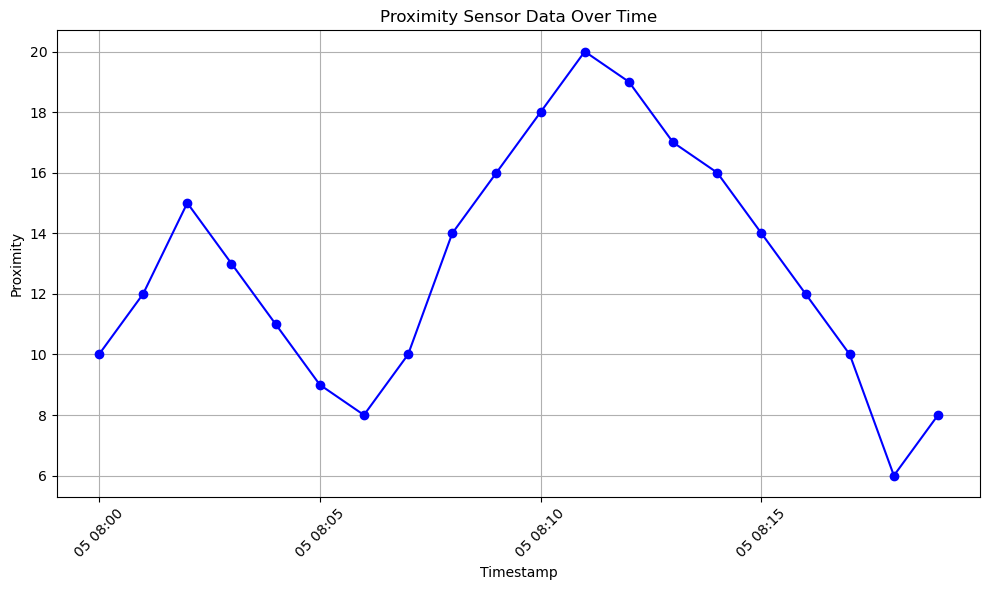

In [31]:
# Data analysis
# Plotting the proximity sensor data over time
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Proximity'], color='blue', marker='o', linestyle='-')
plt.title('Proximity Sensor Data Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Proximity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Convert Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [33]:
# Sort data by Timestamp
data.sort_values(by='Timestamp', inplace=True)

In [34]:
# Calculate dwell time (time difference between consecutive sensor readings)
data['Dwell_Time'] = data['Timestamp'].diff().dt.total_seconds()

In [35]:
# Remove rows with negative or NaN dwell time (due to first readings or missing data)
data = data[data['Dwell_Time'].notnull() & (data['Dwell_Time'] >= 0)]

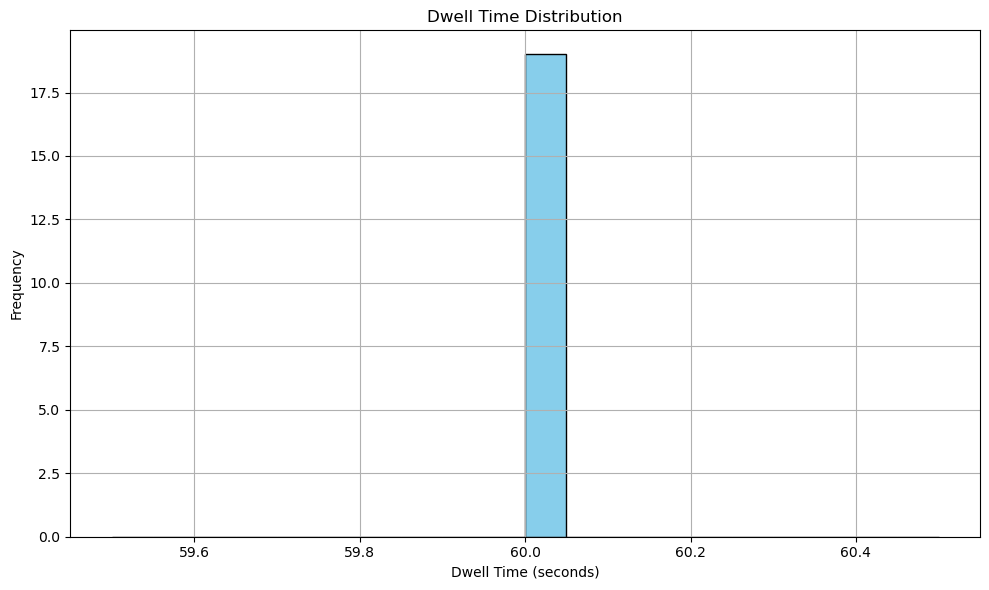

In [36]:
# Plot dwell time distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Dwell_Time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Dwell Time Distribution')
plt.xlabel('Dwell Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Calculate average dwell time
avg_dwell_time = data['Dwell_Time'].mean()
print("Average Dwell Time:", avg_dwell_time, "seconds")

Average Dwell Time: 60.000000000000014 seconds


In [69]:
# Load CSV data into a DataFrame
data = pd.read_csv('Flowrate_sensordata.csv')

In [70]:
# Display the first few rows of the DataFrame
print("First few rows of the flow rate data:")
print(data.head())

First few rows of the flow rate data:
  Timestamp  Flowrate
0  08:00:00      10.5
1  08:01:00      11.2
2  08:02:00      10.8
3  08:03:00      12.0
4  08:04:00      11.5


In [71]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Timestamp    0
Flowrate     0
dtype: int64


In [72]:
# Data Cleaning: Remove rows with missing values
data.dropna(inplace=True)

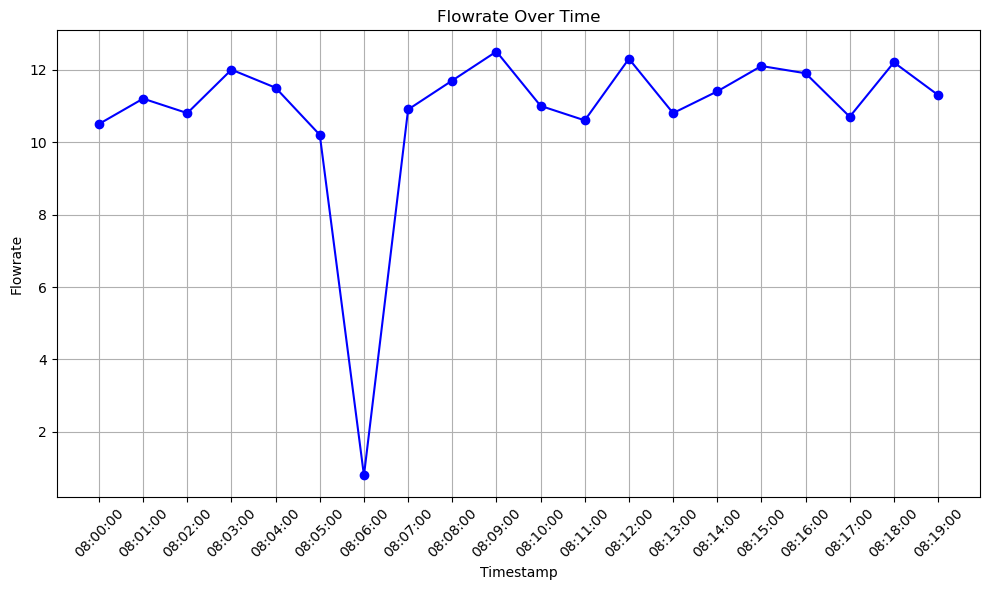

In [73]:
# Data analysis
# Plotting the flow rate over time
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Flowrate'], color='blue', marker='o', linestyle='-')
plt.title('Flowrate Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Flowrate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# Basic statistics of flow rate
print("\nFlowrate statistics:")
print(data['Flowrate'].describe())


Flowrate statistics:
count    20.000000
mean     10.820000
std       2.450048
min       0.800000
25%      10.775000
50%      11.250000
75%      11.925000
max      12.500000
Name: Flowrate, dtype: float64
